# A (Very Short) Introduction to Machine Learning

In the next few sections, we will study **Gradient Descent** (arguably the most widely known and employed optimization method) and **Stochastic Gradient Descent** (a common variant of it). To motivate the introduction of these methods within the context of Machine Learning, we begin by presenting some fundamental concepts of Machine Learning from a mathematical perspective. In particular, we will discuss how the learning problem can be mathematically formulated, and we will outline the typical pipeline used to understand, design, and solve a Machine Learning problem.

Let's start with a widely accepted definition of **Machine Learning**:

> **Machine Learning (ML)** is the collection of techniques and algorithms that extract knowledge from data and use that knowledge to make accurate predictions.

## The learning problem

A learning problem involves extracting knowledge from a dataset of $N$ points:

$$
\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(N)}, y^{(N)}) \}
$$

where each pair $(x^{(i)}, y^{(i)})$ consists of an input and its corresponding output. Think of the input data $x^{(i)} \in \mathbb{R}^d$ as the available information and the output data $y^{(i)} \in \mathbb{R}^s$ as the quantity we want to predict. The input dimension, $d$, represents the number of input features, while the output dimension, $s$, corresponds to the number of variables we aim to predict. To simplify things, we usually represent these as vectors of size $d$ and $s$, respectively.

For example, Machine Learning is widely used to predict house prices based on property characteristics. Suppose we have a dataset where each house is described by features such as:  

- $x_1$: Square footage  
- $x_2$: Number of bedrooms  
- $x_3$: Number of bathrooms  
- $x_4$: Distance to the city center  
- $x_5$: Age of the house  

The goal is to predict the selling price $y$ of a house given its features. Here, the input $x^{(i)} \in \mathbb{R}^5$ represents a vector of property attributes, and the output $y^{(i)} \in \mathbb{R}$ is the house price.  

A Machine Learning model, such as **linear regression**, learns a function $f_\Theta$ that maps inputs to outputs:  

$$
y = f_\Theta(x_1, x_2, x_3, x_4, x_5).
$$

Initially, the model **does not know** how these features influence the price. By **training** on past sales data, it finds patterns and estimates parameters (or weights) that best fit the data. Once trained, the model can predict the price of new houses that were not in the dataset.  

This simple example illustrates the core idea of learning: using past data to make future predictions. More generally, a Machine Learning model can be seen as a mathematical function that maps input features to an output of interest.

```{warning}
This setup assumes that all data is represented as real numbers (since both $x^{(i)}$ and $y^{(i)}$ are real-valued vectors). Handling non-numeric data requires a pre-processing step named *embedding*, which will be discussed in the following.
```

### Mathematical Formulation of Machine Learning Models  

At its core, a Machine Learning (ML) model is a function

$$
f_\Theta: \mathbb{R}^d \to \mathbb{R}^s
$$

that maps an input vector of length $d$ to an output vector of length $s$. The choice of $s$ depends on the application:

* If the model is used for **classification**, where an input belongs to one of $k$ categories, then $s = k$.
* If the model is used for **regression**, $s$ corresponds to the number of predicted values.
* If the model is used for **image reconstruction**, $s$ typically represents the number of pixels in the reconstructed image.

The model's knowledge is encoded in the vector $\Theta$, which represents its **parameters**. To better understand the role of parameters in an ML model, let's start with a simple example: Linear Regression.

Consider a basic model $f_\Theta$ with just two parameters, $\Theta_1$ and $\Theta_2$:

$$
f_\Theta(x) = \Theta_1 + \Theta_2 x.
$$

This equation describes a straight line where $\Theta_1$ is the intercept and $\Theta_2$ is the slope.

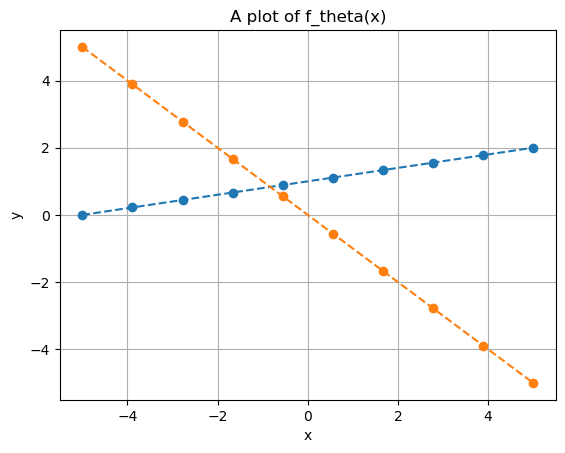

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

Think of $x$ as the input data that we use to predict an output $y$. Notice how different choices of $\Theta$ can lead to vastly different predictions.

Now, let's overlay the available data on the same plot:

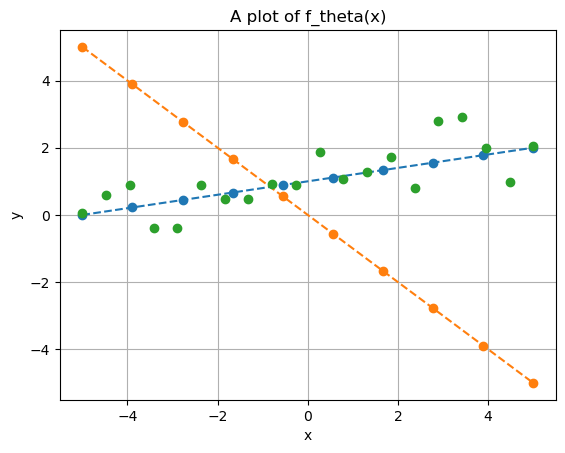

In [2]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

*Which of the two straight lines better fits the given data?* 
Clearly, the blue line, parameterized by $\Theta=(1,0.2)$. In fact, if we check the code used to generate the data, we’ll see that $(1,0.2)$ are the exact parameters that define $y^{(i)}$.

This highlights two fundamental characteristics common to almost all ML models:

* Different choices of $\Theta$ lead to *very different* predictions.
* Given a training set, some parameter choices are better than others, and usually, there is one that is *optimal*. A good model should at least approximate this optimal choice.

The process of finding the optimal parameters for an ML model based on a training set is called *training*. We’ll revisit this topic later when discussing how models are typically trained.

### Linearity

In the example above, we assumed both the input and output dimensions were $d = 1$ and $s = 1$. However, we can easily generalize a linear regression model to higher dimensions ($d > 1$, $s > 1$) using the general linear model:

$$
f_\Theta(x) = W x + b
$$

where the parameters $\Theta = \{ W, b \}$ have dimensions $W \in \mathbb{R}^{s \times d}$ and $b \in \mathbb{R}^s$. This means the total number of parameters to be learned is $s(d+1)$, which grows linearly with the input and output dimensions.

When $d > 1$ and $s > 1$, we can no longer visualize the model’s output in a simple plot, as it would require at least four dimensions.

While linear models have several useful properties, their **expressivity** (i.e., their ability to approximate complex outputs) is quite limited. A linear model can only represent *linear functions* (such as straight lines and planes), making it incapable of even approximating simple functions like $\sin(x)$. This limitation makes linear models impractical for handling complex data, such as images or natural language.

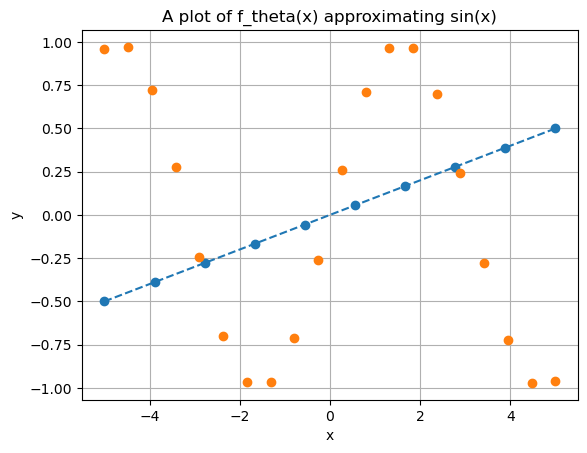

In [3]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = np.sin(x_data)

# Create a linear model approximation
xx = np.linspace(-5, 5, 10)
theta = (0, 0.1)
yy = f(theta, xx)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x) approximating sin(x)")
plt.show()

To this aim, multiple ML algorithms have been proposed in the literature, with the most successful being Polynomial Regression, Support Vector Machines (SVM), Random Forest (RF), and XGBoost.  


## The Machine Learning Pipeline

The example above shows that designing an effective Machine Learning algorithm requires several careful choices, such as the structure of the model, the amount and quality of data, and the values of the parameters. In particular, we can identify the following steps, which are common to most ML algorithms:

- **Understanding** the task (e.g., what do we need? what information can we collect to answer the question we are asking?),
- **Collecting** a sufficiently large dataset, containing enough relevant information to address the task,
- **Designing** the Machine Learning algorithm, leveraging prior knowledge about the problem under study,
- **Training** the algorithm on the collected data, by minimizing the prediction error on the training set,
- **Tuning** the parameters of the model (in ML, an algorithm is often referred to as a *model*) to improve its predictions,
- **Testing** the algorithm on new data, in order to verify its predictive ability.

We will examine each of these steps in more detail in the following sections.

### Understanding the task
Assume we want to solve a given problem. Mathematically, the problem we aim to solve can be modelled as an (unknown) function $f(x)$, taking as input the vector $x \in \mathbb{R}^d$, and mapping it (possibly **stocastically**) to the task $y = f(x)$.

A Machine Learning model $f_\Theta (x)$, parameterized by $\Theta$, is said to **solve** the problem is there exists a choice of parameters $\Theta$ such that 

$$
f_\theta(x) \approx f(x) \qquad \forall x \in \mathbb{R}^d 
$$

#### Is it learnable?
A problem $y = f(x)$ can be solved by a ML algorithm if and only if there **exists** a relationship between $x$ and $y$. For example, we cannot expect to predict the future weather in a particular position by using informations about the stock price of a particular company. In that situation, the input and the output are clearly **indepdendent**, and there is no change to learning anything from one using the other.

Consequently, the first point in designing a ML algorithm is to understand _if_ there exists a correlation between the input and the output of the given problem. When this is the case, we say that the problem is **learnable**.

> **Machine Learning** is about understanding correlations (patterns).

#### It is possible to collect them?
Assume that the problem $y = f(x)$ is learnable. We need to understand if we can physically collect enough data $x$ to be able to understand the relationship between him and its corresponding $y$. 

For example, if we want to use ML to make cancer diagnosis on patients, clearly the best way to do that is to use as input the clinical results of any possible medical exam on the patient. Of course, even if this will work well in practice, it is not possible (and expecially not ethic) to test the patient with thousands of exams for a single diagnosis.

Moreover, to train a good ML model, we will need thousands (sometimes milions) of datapoints, and it is not always possible to scale our problem to be able to collect enough data to solve it.

> Collecting data requires **efficiency** and **scalability** of the problem.

### Collecting data
Collecting data is usually the step that takes the most effort in the design of a Machine Learning algorithm. In fact, given that our problem $y = f(x)$ is solvable and that it is **theoretically possible** to collect enough data about it, it is not always that **easy** in practice.

In particular, some data requires *time* to be collected (this is an example when working in biological or medical applications), and collect good quality data is hard. Indeed, we indeally want to use a clean dataset, where all the informations are presents, there are no missing values (usually referred to as `NaN`) and the informations does not contain noise. Most of the time, this is hopeless, and we will need to develop algorithms to standardize and clean up the data. The set of all those techniques is called **data cleaning**.

#### Kaggle
Luckily, for most of the tasks you can think of, you can find datasets on internet. For example, websites like [Kaggle](https://www.kaggle.com/) and [Google Datasets](https://datasetsearch.research.google.com/) can be helpful for that.

#### Datasets and NumPy Arrays

Datasets in `.csv` format are widely used, as they are easy to read and often come with clearly labeled rows and columns. However, from a mathematical and computational perspective, this format is not ideal for Machine Learning. In particular:

- Working with strings directly is inefficient.  
- Row and column names are not useful for learning algorithms.  
- Most ML algorithms expect data in the form of numeric vectors and matrices.  

For this reason, we almost always **convert datasets into matrices**, typically represented as NumPy arrays. This conversion is performed in two main steps:

1. **Encoding categorical (string) values into numbers**.  
2. **Converting the dataset into a NumPy array**.  

Suppose we have a categorical feature, such as *weather*, with possible values $\{ \text{sunny}, \text{rainy}, \text{cloudy}, \text{snowy} \}$. Since the number of possible values is limited, we can assign each category to a class.

Two classical encoding strategies are:

- **Integer Encoding**: Each class $C_k$ is mapped to an integer index $k$. A crucial drawback of this method is that it introduces an artificial ordering between categories. It is implemented in Python via:  

  ```
  from sklearn.preprocessing import LabelEncoder
  encoder = LabelEncoder()
  encoded = encoder.fit_transform(categories)
  ```

- **One-Hot Encoding**: Each class $C_k$ is mapped to the $k$-th canonical vector $e_k \in \mathbb{R}^K$, which is all zeros except for a single 1 at position $k$. It is implemented in Python via:  

  ```
  from sklearn.preprocessing import OneHotEncoder
  encoder = OneHotEncoder(sparse=False)
  encoded = encoder.fit_transform(categories.reshape(-1, 1))
  ```

After encoding, the dataset can be converted to a NumPy array with:  

```
import numpy as np
X = np.array(encoded_dataset)
```

The result is a matrix:

$$
X = [x_1, x_2, \ldots, x_N] \in \mathbb{R}^{d \times N},
$$

where each column $x_i \in \mathbb{R}^d$ is a datapoint with $d$ features, and $N$ is the number of samples. The corresponding labels are collected in a vector:

$$
Y = [y_1, y_2, \ldots, y_N]^T \in \mathbb{R}^N.
$$

#### Modern Embedding Strategies

While integer and one-hot encodings are simple and effective, they do not capture **semantic relationships** between categories. For example, in one-hot encoding, the vectors for *sunny* and *cloudy* are completely orthogonal, even though they are more similar to each other than to *snowy*.  

To address this limitation, **learned embeddings** are now widely used:

- In **Natural Language Processing (NLP)**, words or tokens are mapped to dense vectors in $\mathbb{R}^d$, called **word embeddings**. These vectors are learned from large corpora so that semantically related words (e.g., *king* and *queen*) are close in the embedding space.
- In modern **Large Language Models (LLMs)**, embeddings are used at multiple levels: for words, subwords, or tokens. These embeddings are **learned jointly with the model parameters**, allowing the network to discover relationships automatically during training.
- Similar strategies are used in **recommender systems** (e.g., embedding users and items) and **graph learning** (node embeddings).

In practice, this means that instead of manually encoding categories, we let the model **learn a representation** that is optimal for the task. In PyTorch, for example, this can be done with the `nn.Embedding` layer:

```
import torch
import torch.nn as nn

# Suppose we have 100 possible categories, mapped into 16-dimensional embeddings
embedding = nn.Embedding(num_embeddings=100, embedding_dim=16)

# Example: category index 5 -> embedding vector in R^16
category_index = torch.tensor([5])
vector = embedding(category_index)
```

### Design

Designing a Machine Learning model is one of the most challenging steps, since it requires choosing the right paradigm depending on the type of problem we want to solve. Broadly speaking, learning algorithms can be grouped into three main categories:

- **Supervised Learning**  
- **Unsupervised Learning**  
- **Self-Supervised Learning** (advanced, not covered in this course)

![](./fig/diagram.png)

#### Supervised Learning

In **Supervised Learning (SL)**, we are given a dataset composed of *input–output* pairs:

$$
\mathcal{D} = \{ (x^{(i)}, y^{(i)}) \}_{i=1}^N,
$$

where $x^{(i)} \in \mathbb{R}^d$ is the input (a feature vector) and $y^{(i)}$ is the corresponding label or target.

The idea of supervised learning is to learn a function:

$$
f_\Theta : \mathbb{R}^d \to \mathcal{Y},
$$

parameterized by $\Theta$, such that $f_\Theta(x^{(i)}) \approx y^{(i)}$.

Supervised learning can be further divided into two major tasks:

- **Regression**: The output $y^{(i)}$ is a real-valued quantity, i.e., $y^{(i)} \in \mathbb{R}^s$.  
  Example: predicting house prices based on property features.  

- **Classification**: The output $y^{(i)}$ belongs to a finite set of classes, i.e., $y^{(i)} \in \{1, \ldots, K\}$.  
  Example: classifying an email as *spam* or *not spam*.  

The quality of a supervised model is typically measured using **loss functions**, which quantify the discrepancy between the predicted value $f_\Theta(x)$ and the true label $y$. During training, we optimize $\Theta$ to minimize this loss over the dataset.

#### Unsupervised Learning

In **Unsupervised Learning (UL)**, we are only given input data without labels:

$$
\mathcal{D} = \{ x^{(i)} \}_{i=1}^N, \quad x^{(i)} \in \mathbb{R}^d.
$$

Here, the task is not to predict a known output, but rather to uncover **hidden structures or patterns** in the data. The model attempts to organize, compress, or explain the data in some meaningful way.

Common tasks include:

- **Clustering**: Grouping data points into clusters such that points in the same group are more similar to each other than to points in other groups.  
  Example: market segmentation of customers based on their purchasing behavior.  

- **Dimensionality Reduction**: Mapping high-dimensional data into a lower-dimensional space while preserving as much information as possible.  
  Example: Principal Component Analysis (PCA) for data visualization.  

Unsupervised learning is often used when labeled data is expensive or impossible to obtain, making it a powerful tool in exploratory data analysis.

#### Self-Supervised Learning

**Self-Supervised Learning (SSL)** is an emerging paradigm that sits between supervised and unsupervised learning. Unlike supervised learning, no human-annotated labels are required. Instead, the model creates its own labels by solving *pretext tasks* defined directly on the input data.

Examples of pretext tasks include:

- Predicting missing words in a sentence (used in large language models such as BERT).  
- Predicting missing parts of an image or the next video frame.  
- Contrastive learning, where the model learns by comparing different views of the same data.  

The key idea is that by solving these automatically generated tasks, the model learns **useful representations** of data, which can then be fine-tuned on smaller labeled datasets for supervised tasks.

Although self-supervised learning has become extremely popular in natural language processing and computer vision, in this course we will not cover it, as our focus will remain on classical **supervised** and **unsupervised** approaches.

In summary:

- **Supervised Learning**: learn from labeled data ($x, y$).  
- **Unsupervised Learning**: learn from unlabeled data ($x$).  
- **Self-Supervised Learning**: generate labels from data itself to pre-train representations.  

In the following lectures, we will study supervised learning methods (both regression and classification) and unsupervised learning methods (such as clustering and dimensionality reduction). Self-supervised learning, while powerful, will be left for more advanced courses.

### Training

The **training phase** is at the heart of every Machine Learning algorithm. Once we have defined a model and collected data, training is the process by which the model *learns* the best parameters $\Theta$ to approximate the underlying function we are trying to capture.

Formally, recall that a Machine Learning model can be written as a parameterized function:

$$
f_\Theta : \mathbb{R}^d \to \mathcal{Y},
$$

where $\Theta$ represents the parameters (weights, biases, coefficients, etc.) that determine how the model processes inputs.

#### The Role of the Loss Function

Training requires a way to measure **how good** a model’s predictions are. This is done through a **loss function** (also called a cost function or objective function), denoted as:

$$
\mathcal{L}(\Theta) = \frac{1}{N} \sum_{i=1}^N \ell(f_\Theta(x^{(i)}), y^{(i)}),
$$

where:
- $(x^{(i)}, y^{(i)})$ are the datapoints from the training set,  
- $f_\Theta(x^{(i)})$ is the model prediction,  
- $\ell(\cdot, \cdot)$ is a local error measure (e.g., squared error, cross-entropy).  

The loss function quantifies the discrepancy between predictions and true outputs.  
The **training problem** is then the optimization problem:

$$
\Theta^* = \arg\min_\Theta \mathcal{L}(\Theta).
$$

#### Training as an Optimization Problem

From a mathematical perspective, training a Machine Learning model is equivalent to solving an **optimization problem**. This is where optimization techniques such as **Gradient Descent** come into play.

- In regression, a common choice of loss is the **Mean Squared Error (MSE)**:
  
  $$
  \ell(f_\Theta(x), y) = \| f_\Theta(x) - y \|^2.
  $$

- In classification, a common choice is the **Cross-Entropy Loss**:
  
  $$
  \ell(f_\Theta(x), y) = - \sum_{k=1}^K \mathbf{1}_{\{y=k\}} \log p_\Theta(y=k|x),
  $$

  where $p_\Theta(y=k|x)$ is the model’s predicted probability of class $k$.

Regardless of the choice of loss, training means finding parameter values $\Theta$ that minimize $\mathcal{L}(\Theta)$.

#### Why Gradient Descent?

In most practical Machine Learning settings, the loss function $\mathcal{L}(\Theta)$ is **not analytically solvable**:
- It is usually non-linear in the parameters.  
- It may involve millions (or even billions) of parameters.  
- The dataset size $N$ can be extremely large.  

For this reason, closed-form solutions (like in simple linear regression) are not possible in general. Instead, we rely on **iterative optimization algorithms**. The most fundamental one is **Gradient Descent (GD)**.

The key idea of Gradient Descent is simple:
- Compute the gradient of the loss function with respect to the parameters, $\nabla_\Theta \mathcal{L}(\Theta)$.  
- Update the parameters in the direction that decreases the loss:  
  
  $$
  \Theta \leftarrow \Theta - \eta \, \nabla_\Theta \mathcal{L}(\Theta),
  $$

  where $\eta > 0$ is the **learning rate**.

This iterative update rule gradually moves the parameters towards values that minimize the loss.

#### The Stochastic Setting

When datasets are very large, computing the exact gradient $\nabla_\Theta \mathcal{L}(\Theta)$ over all $N$ samples can be prohibitively expensive. To address this, we use **Stochastic Gradient Descent (SGD)**, where the gradient is estimated using only a subset (a mini-batch) of the data:

$$
\nabla_\Theta \mathcal{L}(\Theta) \approx \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla_\Theta \, \ell(f_\Theta(x^{(i)}), y^{(i)}),
$$

with $\mathcal{B} \subset \{1, \dots, N\}$.  

This drastically reduces computation per step and introduces noise in the updates, which, paradoxically, often helps escape poor local minima.

#### Training as the Motivation for Optimization

The importance of training in Machine Learning is twofold:

1. **Conceptual**: Training is where a model goes from a random, uninformed state to one that encodes useful knowledge about the data.  
2. **Mathematical**: Training transforms the learning problem into an optimization problem.  

This motivates why optimization, and in particular **Gradient Descent and its variants**, is central to Machine Learning. In the next two classes, we will study Gradient Descent and Stochastic Gradient Descent in detail, analyzing both their mathematical foundations and their practical implementations.

### Tuning

Most Machine Learning models have a number of **hyperparameters** that are not directly learned during training but must be set by the practitioner. Examples include the learning rate in Gradient Descent, the number of layers in a neural network, or the number of clusters in a clustering algorithm.  

Tuning consists of systematically adjusting these hyperparameters to improve the model’s performance. This is usually done through a **trial-and-error process**, guided by prior knowledge of the model and by evaluating performance on a separate validation set.  

The balance is delicate: poor tuning may lead to **underfitting** (the model is too simple to capture the data structure) or **overfitting** (the model memorizes the training set without generalizing).

### Testing

Once a model has been trained (parameters optimized) and tuned (hyperparameters chosen), we need to evaluate its **ability to generalize**. This means assessing how well the model performs on data it has never seen before.  

Testing is therefore a fundamental step: it allows us to verify whether the model has truly learned useful patterns or whether it has merely memorized the training data.

#### Training vs Testing Data

Using the same dataset for both training and testing is misleading. On training data, the model has already observed the true outcomes, so it might simply **memorize** the data. This phenomenon is known as **overfitting**.  

To avoid this, the dataset is typically split into:
- **Training set**: used to adjust model parameters,  
- **Validation set**: sometimes used to tune hyperparameters,  
- **Test set**: used only once at the end, to provide an unbiased estimate of performance.

Formally, if we start with $N$ datapoints, we select:

$$
N_{\text{train}} < N, \quad N_{\text{test}} = N - N_{\text{train}},
$$

with the test set kept aside during the entire training and tuning process.

![](./fig/train_test_split.png)

#### Evaluation Metrics

The choice of metric depends on the task:

- **Regression**:  
  - Mean Squared Error (MSE):  
    
    $$
    \text{MSE} = \frac{1}{N_{\text{test}}} \sum_{i=1}^{N_{\text{test}}} \big(f_\Theta(x^{(i)}) - y^{(i)}\big)^2
    $$
      
  - Mean Absolute Error (MAE), $R^2$ score, etc.

- **Classification**:  
  - Accuracy: the proportion of correctly classified samples,  
  - Precision, Recall, F1-score (especially in imbalanced datasets),  
  - AUROC (Area Under the ROC Curve) for probabilistic classifiers.  

The key idea is to evaluate not only how close predictions are to labels, but also whether the model is making the **right kind of mistakes** for the problem at hand.

#### Underfitting vs Overfitting

A crucial aspect of testing is understanding the **generalization behavior** of a model. Two extreme situations can occur:

- **Underfitting**:  
  The model is *too simple*. It fails to capture the underlying structure of the data, leading to **high error** both on the training set and on the test set.  
  Example: trying to fit a straight line to highly nonlinear data.

- **Overfitting**:  
  The model is *too complex*. It adapts too closely to the training data, capturing even noise and irrelevant patterns. This leads to **low error** on the training set but **high error** on the test set.  
  Example: a deep decision tree that perfectly classifies the training set but fails on new data.

The ideal model lies **between underfitting and overfitting**, achieving low training error and comparable test error. The difference between these two errors is called the **generalization gap**. A small gap indicates that the model generalizes well.

#### Summary

- **Tuning** adjusts hyperparameters to control model complexity.  
- **Testing** evaluates generalization on unseen data.  
- **Underfitting**: the model is too simple, fails everywhere.  
- **Overfitting**: the model is too complex, memorizes training data but fails on new samples.  
- The ultimate goal is to minimize the **generalization gap** and ensure the model learns patterns that transfer beyond the training set.